In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.style.use('ggplot')

In [6]:
# combine train and test set.
train = pd.read_csv(r"C:\Users\Prathamesh\Desktop\Kaggle-Titanic-master\Data\titanic_train.csv")
test = pd.read_csv(r"C:\Users\Prathamesh\Desktop\Kaggle-Titanic-master\Data\titanic_test.csv")
full=pd.concat([train,test],ignore_index=True)

In [7]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
full['Embarked'].fillna('S',inplace=True)

In [10]:
full[full.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [11]:
full.Fare.fillna(full[full.Pclass==3]['Fare'].median(),inplace=True)

In [12]:
full.loc[full.Cabin.notnull(),'Cabin']=1
full.loc[full.Cabin.isnull(),'Cabin']=0

In [13]:
full.Cabin.isnull().sum()

0

Text(0.5, 1.0, 'Survival Rate')

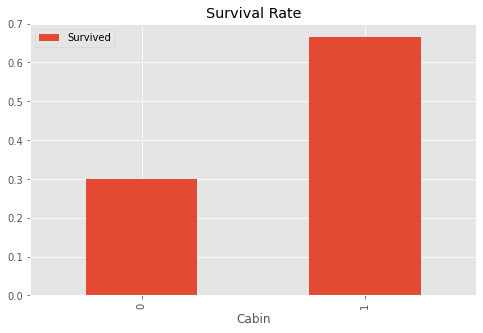

In [14]:
pd.pivot_table(full,index=['Cabin'],values=['Survived']).plot.bar(figsize=(8,5))
plt.title('Survival Rate')

__We can also plot the count of 'Cabin' to see some patterns.__

In [15]:
cabin=pd.crosstab(full.Cabin,full.Survived)
cabin.rename(index={0:'no cabin',1:'cabin'},columns={0.0:'Dead',1.0:'Survived'},inplace=True)
cabin

Survived,Dead,Survived
Cabin,,
no cabin,481,206
cabin,68,136


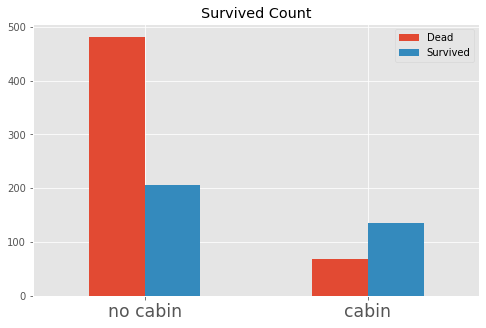

In [16]:
cabin.plot.bar(figsize=(8,5))
plt.xticks(rotation=0,size='xx-large')
plt.title('Survived Count')
plt.xlabel('')
plt.legend()

In [17]:
full['Title']=full['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [18]:
full.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Mme               1
Lady              1
Dona              1
Sir               1
Capt              1
the Countess      1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [19]:
pd.crosstab(full.Title,full.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


__All the 'Title' belongs to one kind of gender except for 'Dr'.__

In [20]:
full[(full.Title=='Dr')&(full.Sex=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,1,S,Dr


In [21]:
nn={'Capt':'Rareman', 'Col':'Rareman','Don':'Rareman','Dona':'Rarewoman',
    'Dr':'Rareman','Jonkheer':'Rareman','Lady':'Rarewoman','Major':'Rareman',
    'Master':'Master','Miss':'Miss','Mlle':'Rarewoman','Mme':'Rarewoman',
    'Mr':'Mr','Mrs':'Mrs','Ms':'Rarewoman','Rev':'Mr','Sir':'Rareman',
    'the Countess':'Rarewoman'}

In [22]:
full.Title=full.Title.map(nn)

In [23]:
# assign the female 'Dr' to 'Rarewoman'
full.loc[full.PassengerId==797,'Title']='Rarewoman'

In [24]:
full.Title.value_counts()

Mr           765
Miss         260
Mrs          197
Master        61
Rareman       17
Rarewoman      9
Name: Title, dtype: int64

In [25]:
full[full.Title=='Master']['Sex'].value_counts()

male    61
Name: Sex, dtype: int64

In [26]:
full[full.Title=='Master']['Age'].describe()

count    53.000000
mean      5.482642
std       4.161554
min       0.330000
25%       2.000000
50%       4.000000
75%       9.000000
max      14.500000
Name: Age, dtype: float64

In [27]:
full[full.Title=='Miss']['Age'].describe()

count    210.000000
mean      21.774238
std       12.249077
min        0.170000
25%       15.000000
50%       22.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

In [28]:
full.Age.fillna(999,inplace=True)

In [29]:
def girl(aa):
    if (aa.Age!=999)&(aa.Title=='Miss')&(aa.Age<=14):
        return 'Girl'
    elif (aa.Age==999)&(aa.Title=='Miss')&(aa.Parch!=0):
        return 'Girl'
    else:
        return aa.Title

In [30]:
full['Title']=full.apply(girl,axis=1)

In [31]:
full.Title.value_counts()

Mr           765
Miss         201
Mrs          197
Master        61
Girl          59
Rareman       17
Rarewoman      9
Name: Title, dtype: int64

In [32]:
full[full.Age==999]['Age'].value_counts()

999.0    263
Name: Age, dtype: int64

In [33]:
Tit=['Mr','Miss','Mrs','Master','Girl','Rareman','Rarewoman']
for i in Tit:
    full.loc[(full.Age==999)&(full.Title==i),'Age']=full.loc[full.Title==i,'Age'].median()

In [34]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [35]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr


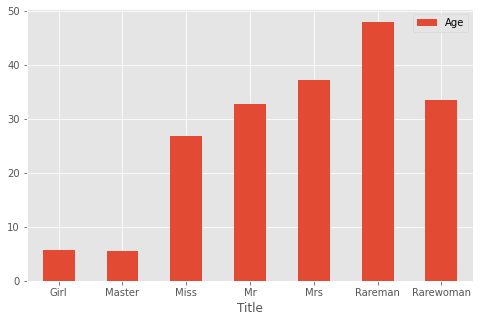

In [36]:
full.groupby(['Title'])[['Age','Title']].mean().plot(kind='bar',figsize=(8,5))
plt.xticks(rotation=0)
plt.show()

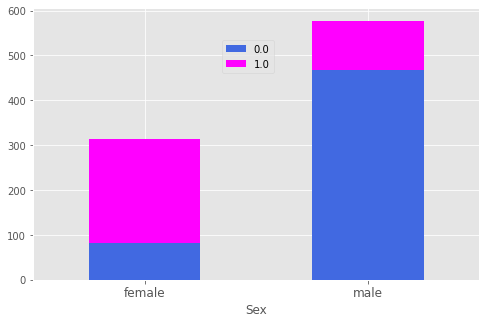

In [37]:
pd.crosstab(full.Sex,full.Survived).plot.bar(stacked=True,figsize=(8,5),color=['#4169E1','#FF00FF'])
plt.xticks(rotation=0,size='large')
plt.legend(bbox_to_anchor=(0.55,0.9))

In [38]:
agehist=pd.concat([full[full.Survived==1]['Age'],full[full.Survived==0]['Age']],axis=1)
agehist.columns=['Survived','Dead']
agehist.head()

,Survived,Dead
0,NaN,22.0
1,38.0,NaN
2,26.0,NaN
3,35.0,NaN
4,NaN,35.0


<AxesSubplot:ylabel='Frequency'>

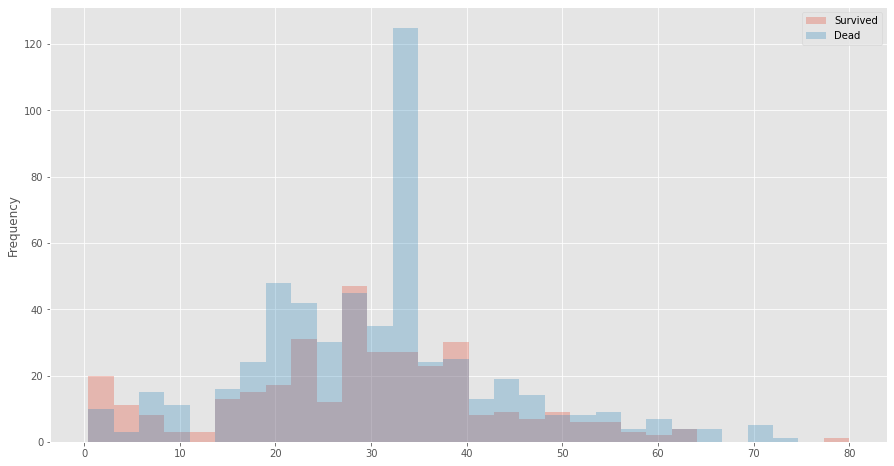

In [39]:
agehist.plot(kind='hist',bins=30,figsize=(15,8),alpha=0.3)

In [40]:
farehist=pd.concat([full[full.Survived==1]['Fare'],full[full.Survived==0]['Fare']],axis=1)
farehist.columns=['Survived','Dead']
farehist.head()

,Survived,Dead
0,NaN,7.25
1,71.2833,NaN
2,7.9250,NaN
3,53.1000,NaN
4,NaN,8.05


<AxesSubplot:ylabel='Frequency'>

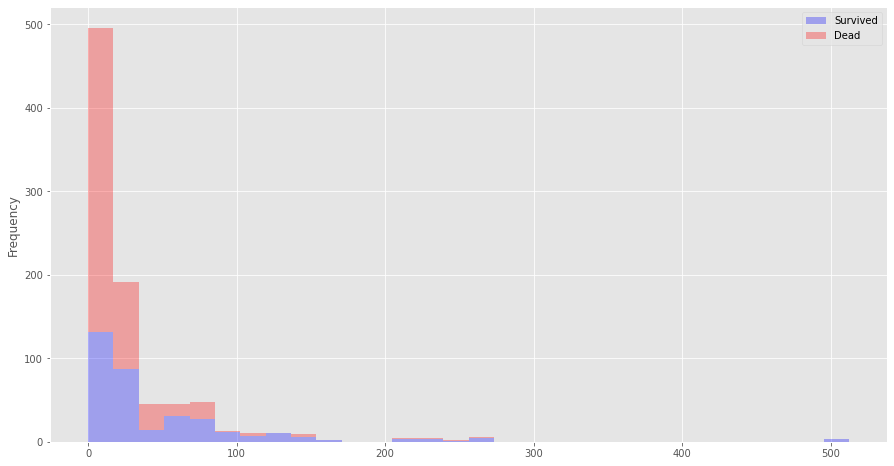

In [41]:
farehist.plot.hist(bins=30,figsize=(15,8),alpha=0.3,stacked=True,color=['blue','red'])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Girl'),
  Text(1, 0, 'Master'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Mr'),
  Text(4, 0, 'Mrs'),
  Text(5, 0, 'Rareman'),
  Text(6, 0, 'Rarewoman')])

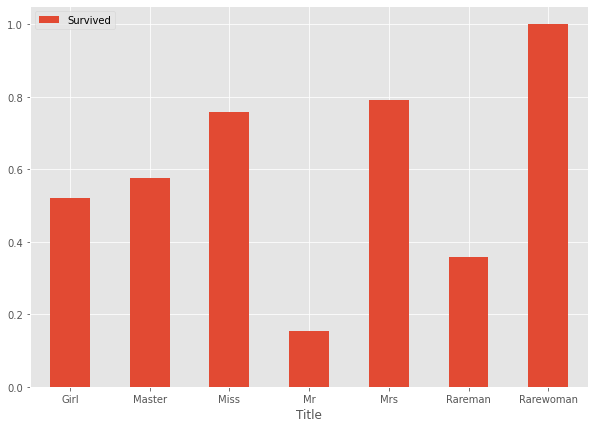

In [42]:
full.groupby(['Title'])[['Title','Survived']].mean().plot(kind='bar',figsize=(10,7))
plt.xticks(rotation=0)

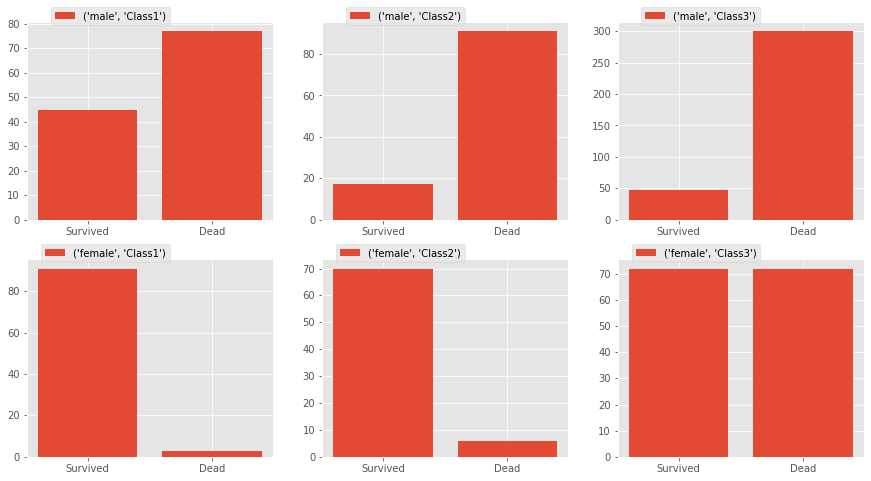

In [43]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
Sex1=['male','female']
for i,ax in zip(Sex1,axes):
    for j,pp in zip(range(1,4),ax):
        PclassSex=full[(full.Sex==i)&(full.Pclass==j)]['Survived'].value_counts().sort_index(ascending=False)
        pp.bar(range(len(PclassSex)),PclassSex,label=(i,'Class'+str(j)))
        pp.set_xticks((0,1))
        pp.set_xticklabels(('Survived','Dead'))
        pp.legend(bbox_to_anchor=(0.6,1.1))

In [47]:
# create age bands
full.AgeCut=pd.cut(full.Age,5)

In [48]:
# create fare bands
full.FareCut=pd.qcut(full.Fare,5)

In [49]:
full.AgeCut.value_counts().sort_index()

(0.0902, 16.136]    152
(16.136, 32.102]    564
(32.102, 48.068]    473
(48.068, 64.034]    107
(64.034, 80.0]       13
Name: Age, dtype: int64

In [50]:
full.FareCut.value_counts().sort_index()

(-0.001, 7.854]      275
(7.854, 10.5]        255
(10.5, 21.558]       255
(21.558, 41.579]     265
(41.579, 512.329]    259
Name: Fare, dtype: int64

In [51]:
# replace agebands with ordinals
full.loc[full.Age<=16.136,'AgeCut']=1
full.loc[(full.Age>16.136)&(full.Age<=32.102),'AgeCut']=2
full.loc[(full.Age>32.102)&(full.Age<=48.068),'AgeCut']=3
full.loc[(full.Age>48.068)&(full.Age<=64.034),'AgeCut']=4
full.loc[full.Age>64.034,'AgeCut']=5

In [52]:
full.loc[full.Fare<=7.854,'FareCut']=1
full.loc[(full.Fare>7.854)&(full.Fare<=10.5),'FareCut']=2
full.loc[(full.Fare>10.5)&(full.Fare<=21.558),'FareCut']=3
full.loc[(full.Fare>21.558)&(full.Fare<=41.579),'FareCut']=4
full.loc[full.Fare>41.579,'FareCut']=5

<AxesSubplot:xlabel='FareCut'>

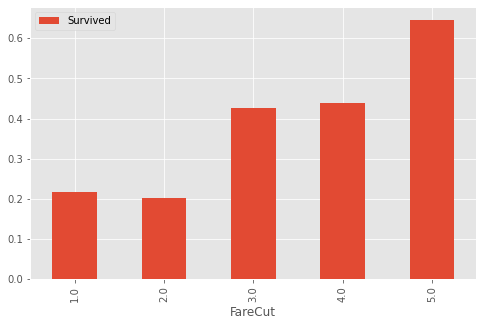

In [53]:
full[['FareCut','Survived']].groupby(['FareCut']).mean().plot.bar(figsize=(8,5))

In [54]:
full.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeCut,FareCut
PassengerId,1.000000,-0.005007,-0.038354,0.026528,-0.055224,0.008942,0.031029,0.017900,-0.003346
Survived,-0.005007,1.000000,-0.338481,-0.077692,-0.035322,0.081629,0.257307,-0.103700,0.318206
Pclass,-0.038354,-0.338481,1.000000,-0.361790,0.060832,0.018322,-0.558740,-0.328087,-0.720881
Age,0.026528,-0.077692,-0.361790,1.000000,-0.259798,-0.161843,0.153051,0.939760,0.129070
SibSp,-0.055224,-0.035322,0.060832,-0.259798,1.000000,0.373587,0.160388,-0.256077,0.351834
Parch,0.008942,0.081629,0.018322,-0.161843,0.373587,1.000000,0.221668,-0.159184,0.337256
Fare,0.031029,0.257307,-0.558740,0.153051,0.160388,0.221668,1.000000,0.135191,0.603698
AgeCut,0.017900,-0.103700,-0.328087,0.939760,-0.256077,-0.159184,0.135191,1.000000,0.091607
FareCut,-0.003346,0.318206,-0.720881,0.129070,0.351834,0.337256,0.603698,0.091607,1.000000


In [55]:
full[full.Survived.notnull()].pivot_table(index=['Title','Pclass'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Title     Pclass          
Rarewoman 2       1.000000
          1       1.000000
Master    1       1.000000
          2       1.000000
Girl      2       1.000000
Miss      1       0.977273
Mrs       1       0.976190
Miss      2       0.920000
Mrs       2       0.902439
Miss      3       0.552239
Mrs       3       0.500000
Girl      1       0.500000
Rareman   1       0.416667
Girl      3       0.400000
Master    3       0.392857
Mr        1       0.345794
          3       0.112853
          2       0.082474
Rareman   2       0.000000

In [51]:
full[full.Survived.notnull()].pivot_table(index=['Title','Parch'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Title     Parch          
Rarewoman 0      1.000000
Master    0      1.000000
Miss      1      0.875000
          2      0.857143
Mrs       0      0.855072
          1      0.812500
          2      0.769231
          3      0.750000
Girl      0      0.750000
Miss      0      0.736842
Girl      1      0.650000
Master    1      0.608696
          2      0.500000
Rareman   0      0.384615
Girl      2      0.363636
Mrs       5      0.250000
Mr        0      0.157447
          1      0.147059
          2      0.133333
          4      0.000000
          5      0.000000
Mrs       4      0.000000
          6      0.000000
Rareman   1      0.000000
Mr        3      0.000000

In [52]:
# only choose the object with not null 'Survived'.
TPP=full[full.Survived.notnull()].pivot_table(index=['Title','Pclass','Parch'],values=['Survived']).sort_values('Survived',ascending=False)
TPP

Survived
Title     Pclass Parch          
Rarewoman 2      0      1.000000
Master    3      0      1.000000
Mrs       1      1      1.000000
          2      2      1.000000
                 3      1.000000
Miss      2      2      1.000000
                 1      1.000000
          1      2      1.000000
Mrs       1      0      1.000000
Miss      1      1      1.000000
Girl      2      1      1.000000
Master    2      2      1.000000
                 1      1.000000
          1      2      1.000000
Rarewoman 1      0      1.000000
Girl      2      2      1.000000
Miss      1      0      0.966667
Mrs       2      1      0.909091
Miss      2      0      0.904762
Mrs       2      0      0.869565
Girl      3      0      0.750000
Mrs       3      2      0.666667
                 0      0.611111
Miss      3      0      0.571429
Girl      3      1      0.533333
Mrs       1      2      0.500000
          3      3      0.500000
Girl      1      2      0.500000
Rareman   1      0      0.454545
Mrs       3      1      0.444444
Master    3      1      0.437500
Mr        1      2      0.400000
                 0      0.352273
Miss      3      2      0.333333
Mr        1      1      0.307692
Master    3      2      0.272727
Mrs       3      5      0.250000
Girl      3      2      0.187500
Mr        3      0      0.118644
          2      0      0.091954
          3      1      0.071429
          1      4      0.000000
Miss      3      1      0.000000
Mr        2      2      0.000000
          3      5      0.000000
Mrs       3      4      0.000000
Mr        3      4      0.000000
Mrs       3      6      0.000000
Mr        3      3      0.000000
Rareman   1      1      0.000000
          2      0      0.000000
Mr        3      2      0.000000
          2      1      0.000000

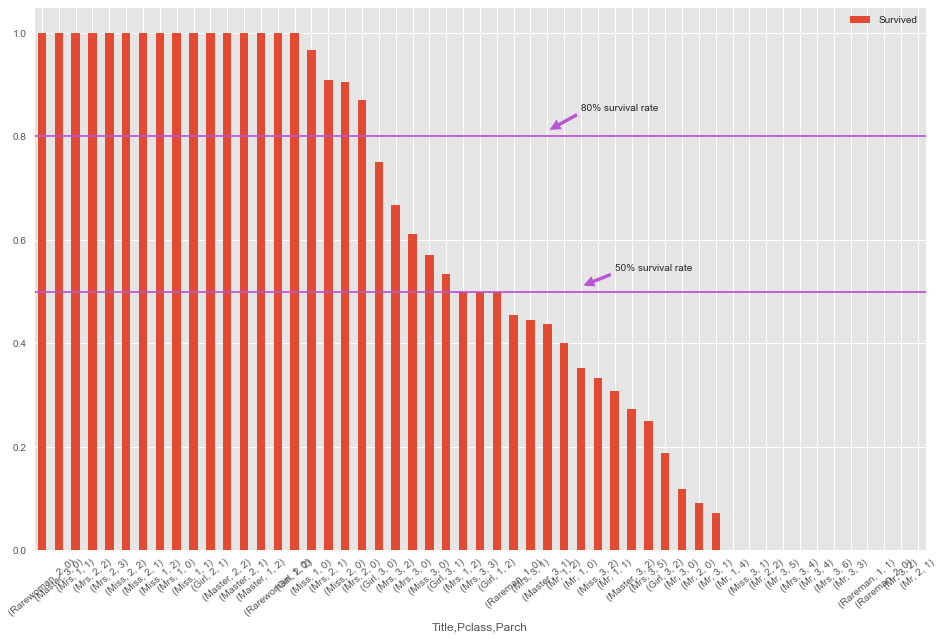

In [53]:
TPP.plot(kind='bar',figsize=(16,10))
plt.xticks(rotation=40)
plt.axhline(0.8,color='#BA55D3')
plt.axhline(0.5,color='#BA55D3')
plt.annotate('80% survival rate',xy=(30,0.81),xytext=(32,0.85),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% survival rate',xy=(32,0.51),xytext=(34,0.54),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))

In [54]:
# use 'Title','Pclass','Parch' to generate feature 'TPP'.
Tit=['Girl','Master','Mr','Miss','Mrs','Rareman','Rarewoman']
for i in Tit:
    for j in range(1,4):
        for g in range(0,10):
            if full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0.8:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=1
            elif full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0.5:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=2
            elif full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=3
            else: 
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=4

In [55]:
full[full.TPP==4]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeCut,FareCut,TPP
915,48.0,1,C,262.375,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",3,916,1,female,1,NaN,PC 17608,Mrs,3.0,5.0,4.0
960,60.0,1,S,263.000,"Fortune, Mrs. Mark (Mary McDougald)",4,961,1,female,1,NaN,19950,Mrs,4.0,5.0,4.0
979,33.0,0,Q,7.750,"O'Donoghue, Ms. Bridget",0,980,3,female,0,NaN,364856,Rarewoman,3.0,1.0,4.0
1011,12.0,0,S,15.750,"Watt, Miss. Bertha J",0,1012,2,female,0,NaN,C.A. 33595,Girl,1.0,3.0,4.0
1030,40.0,0,S,46.900,"Goodwin, Mr. Charles Frederick",6,1031,3,male,1,NaN,CA 2144,Mr,3.0,5.0,4.0
1033,61.0,1,C,262.375,"Ryerson, Mr. Arthur Larned",3,1034,1,male,1,NaN,PC 17608,Mr,4.0,5.0,4.0
1233,34.5,0,S,69.550,"Sage, Mr. John George",9,1234,3,male,1,NaN,CA. 2343,Mr,3.0,5.0,4.0
1256,39.0,0,S,69.550,"Sage, Mrs. John (Annie Bullen)",9,1257,3,female,1,NaN,CA. 2343,Mrs,3.0,5.0,4.0


__ We can simply classify them by 'Sex'&'Pclass'.__

In [56]:
full.ix[(full.TPP==4)&(full.Sex=='female')&(full.Pclass!=3),'TPP']=1
full.ix[(full.TPP==4)&(full.Sex=='female')&(full.Pclass==3),'TPP']=2
full.ix[(full.TPP==4)&(full.Sex=='male')&(full.Pclass!=3),'TPP']=2
full.ix[(full.TPP==4)&(full.Sex=='male')&(full.Pclass==3),'TPP']=3

In [57]:
full.TPP.value_counts()

3.0    870
1.0    262
2.0    177
Name: TPP, dtype: int64

In [58]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
AgeCut         1309 non-null float64
FareCut        1309 non-null float64
TPP            1309 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 163.7+ KB


# Basic Modeling & Evaluation

In [59]:
predictors=['Cabin','Embarked','Parch','Pclass','Sex','SibSp','Title','AgeCut','TPP','FareCut','Age','Fare']

In [60]:
# convert categorical variables to numerical variables
full_dummies=pd.get_dummies(full[predictors])

In [61]:
full_dummies.head()

,Parch,Pclass,SibSp,AgeCut,TPP,FareCut,Age,Fare,Cabin_0,Cabin_1,...,Embarked_S,Sex_female,Sex_male,Title_Girl,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rareman,Title_Rarewoman
0,0,3,1,2.0,3.0,1.0,22.0,7.2500,1,0,...,1,0,1,0,0,0,1,0,0,0
1,0,1,1,3.0,1.0,5.0,38.0,71.2833,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,3,0,2.0,2.0,2.0,26.0,7.9250,1,0,...,1,1,0,0,0,1,0,0,0,0
3,0,1,1,3.0,1.0,5.0,35.0,53.1000,0,1,...,1,1,0,0,0,0,0,1,0,0
4,0,3,0,3.0,3.0,2.0,35.0,8.0500,1,0,...,1,0,1,0,0,0,1,0,0,0


In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [64]:
models=[KNeighborsClassifier(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),
       GradientBoostingClassifier(),SVC()]

In [65]:
full.shape,full_dummies.shape

((1309, 16), (1309, 22))

In [66]:
X=full_dummies[:891]
y=full.Survived[:891]
test_X=full_dummies[891:]

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler=StandardScaler()
X_scaled=scaler.fit(X).transform(X)
test_X_scaled=scaler.fit(X).transform(test_X)

In [69]:
# evaluate models by using cross-validation
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X,y,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.722876869778,[ 0.68156425  0.7150838   0.73033708  0.73033708  0.75706215]
LR:0.831672250422,[ 0.83798883  0.82681564  0.80337079  0.83707865  0.85310734]
NB:0.810311027039,[ 0.83798883  0.81005587  0.79775281  0.78089888  0.82485876]
Tree:0.785673102259,[ 0.7877095   0.75418994  0.84269663  0.75280899  0.79096045]
RF:0.800204518994,[ 0.79888268  0.81005587  0.84269663  0.75842697  0.79096045]
GDBT:0.841822627028,[ 0.8547486   0.80446927  0.86516854  0.80337079  0.88135593]
SVM:0.747564940189,[ 0.72067039  0.73184358  0.76404494  0.73595506  0.78531073]


In [70]:
# used scaled data
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.808133025651,[ 0.81564246  0.78212291  0.79775281  0.80898876  0.83615819]
LR:0.832833650201,[ 0.82681564  0.81564246  0.8258427   0.83146067  0.86440678]
NB:0.800337117662,[ 0.75418994  0.79888268  0.82022472  0.7752809   0.85310734]
Tree:0.782302315742,[ 0.78212291  0.75977654  0.8258427   0.75280899  0.79096045]
RF:0.812589532472,[ 0.82681564  0.7877095   0.85393258  0.7752809   0.81920904]
GDBT:0.841822627028,[ 0.8547486   0.80446927  0.86516854  0.80337079  0.88135593]
SVM:0.833944833422,[ 0.83798883  0.82681564  0.83146067  0.79775281  0.87570621]


In [71]:
model=GradientBoostingClassifier()

In [72]:
model.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [73]:
model.feature_importances_

array([  8.23873192e-03,   1.55330255e-02,   4.23491355e-02,
         1.73248767e-02,   1.58137778e-01,   7.00455031e-03,
         2.81746705e-01,   3.56681604e-01,   1.31821169e-02,
         1.31893025e-02,   2.71040896e-03,   2.88669758e-04,
         1.50828689e-02,   4.70109269e-04,   2.09220151e-03,
         3.74471722e-03,   1.81631536e-02,   4.23201420e-03,
         2.76442479e-02,   1.04389872e-02,   1.74479529e-03,
         0.00000000e+00])

In [74]:
X.columns

Index([u'Parch', u'Pclass', u'SibSp', u'AgeCut', u'TPP', u'FareCut', u'Age',
       u'Fare', u'Cabin_0', u'Cabin_1', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S', u'Sex_female', u'Sex_male', u'Title_Girl',
       u'Title_Master', u'Title_Miss', u'Title_Mr', u'Title_Mrs',
       u'Title_Rareman', u'Title_Rarewoman'],
      dtype='object')

In [75]:
fi=pd.DataFrame({'importance':model.feature_importances_},index=X.columns)

In [76]:
fi.sort_values('importance',ascending=False)

,importance
Fare,0.356682
Age,0.281747
TPP,0.158138
SibSp,0.042349
Title_Mr,0.027644
Title_Master,0.018163
AgeCut,0.017325
Pclass,0.015533
Embarked_S,0.015083
Cabin_1,0.013189


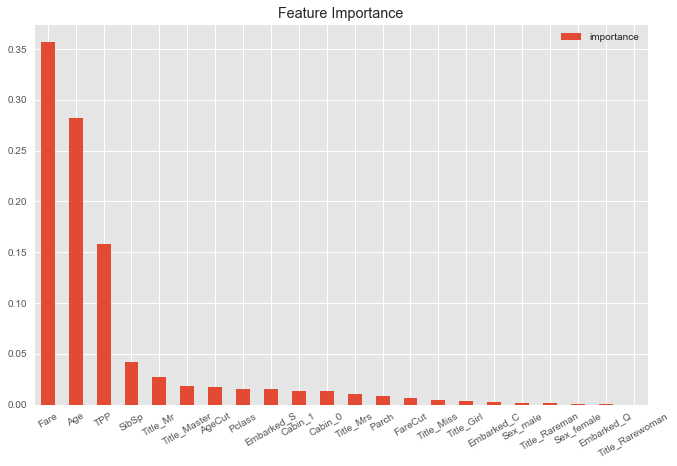

In [77]:
fi.sort_values('importance',ascending=False).plot.bar(figsize=(11,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

In [78]:
from sklearn.model_selection import KFold

In [79]:
kf=KFold(n_splits=10,random_state=1)

In [80]:
kf.get_n_splits(X)

10

In [81]:
print(kf)

KFold(n_splits=10, random_state=1, shuffle=False)


In [82]:
# extract the indices of misclassified observations
rr=[]
for train_index, val_index in kf.split(X):
    pred=model.fit(X.ix[train_index],y[train_index]).predict(X.ix[val_index])
    rr.append(y[val_index][pred!=y[val_index]].index.values)

In [83]:
rr

[array([ 2, 14, 17, 18, 21, 23, 25, 30, 36, 38, 40, 41, 49, 55, 68, 74, 79,
        81, 85], dtype=int64),
 array([106, 107, 111, 114, 127, 137, 139, 140, 141, 142, 146, 165, 169, 177], dtype=int64),
 array([184, 187, 199, 204, 205, 207, 209, 220, 224, 226, 233, 235, 240,
        246, 248, 251, 261, 264, 267], dtype=int64),
 array([271, 273, 279, 283, 286, 288, 297, 301, 312, 315, 328, 330, 338,
        347, 351], dtype=int64),
 array([357, 361, 390, 391, 396, 400, 414, 415, 429, 431, 444], dtype=int64),
 array([447, 449, 452, 453, 455, 460, 483, 489, 501, 502, 505, 507, 509,
        510, 534], dtype=int64),
 array([536, 543, 547, 550, 553, 554, 569, 570, 578, 579, 587, 604, 607,
        617, 621, 622], dtype=int64),
 array([630, 632, 643, 645, 647, 649, 654, 659, 660, 664, 673, 677, 680,
        692, 698, 711, 712], dtype=int64),
 array([729, 744, 748, 762, 767, 772, 782], dtype=int64),
 array([804, 807, 816, 821, 828, 839, 852, 854, 855, 857], dtype=int64)]

In [84]:
# combine all the indices
whole_index=np.concatenate(rr)
len(whole_index)

143

In [85]:
full.ix[whole_index].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeCut,FareCut,TPP
2,26.0,0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,2.0,2.0,2.0
14,14.0,0,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,female,0,0.0,350406,Girl,1.0,2.0,2.0
17,34.5,0,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373,Mr,3.0,3.0,3.0
18,31.0,0,S,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,female,1,0.0,345763,Mrs,2.0,3.0,2.0
21,34.0,1,S,13.0000,"Beesley, Mr. Lawrence",0,22,2,male,0,1.0,248698,Mr,3.0,3.0,3.0


In [86]:
diff=full.ix[whole_index]

In [87]:
diff.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,AgeCut,FareCut,TPP
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,30.867133,25.823951,0.265734,403.167832,2.335664,0.426573,0.643357,2.426573,2.958042,2.608392
std,12.678160,28.147027,0.691508,248.636308,0.887662,0.773592,0.480692,0.782642,1.331494,0.581825
min,2.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,23.500000,7.925000,0.000000,202.500000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,30.000000,15.245800,0.000000,397.000000,3.000000,0.000000,1.000000,2.000000,3.000000,3.000000
75%,37.000000,29.700000,0.000000,620.000000,3.000000,1.000000,1.000000,3.000000,4.000000,3.000000
max,80.000000,151.550000,5.000000,858.000000,3.000000,4.000000,1.000000,5.000000,5.000000,3.000000


In [88]:
diff.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket,Title
count,143,143,143,143,143,143
unique,2,3,143,2,131,6
top,0,S,"Pickard, Mr. Berk (Berk Trembisky)",male,1601,Mr
freq,105,102,1,86,5,77


In [89]:
# both mean and count of 'survived' should be considered.
diff.groupby(['Title'])['Survived'].agg([('average','mean'),('number','count')])

,average,number
Title,,
Girl,0.333333,6
Master,1.000000,3
Miss,0.333333,30
Mr,0.831169,77
Mrs,0.428571,21
Rareman,0.666667,6


In [90]:
diff.groupby(['Title','Pclass'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title   Pclass                  
Girl    1       0.000000       1
        3       0.400000       5
Master  3       1.000000       3
Miss    1       0.000000       1
        2       0.000000       2
        3       0.370370      27
Mr      1       0.656250      32
        2       0.888889       9
        3       0.972222      36
Mrs     2       0.000000       4
        3       0.529412      17
Rareman 1       0.666667       6

In [91]:
diff.groupby(['Title','Pclass','Parch','SibSp'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title   Pclass Parch SibSp                  
Girl    1      2     1      0.000000       1
        3      0     0      0.000000       1
               1     0      0.000000       1
                     1      0.000000       1
               2     0      1.000000       1
                     4      1.000000       1
Master  3      1     1      1.000000       1
               2     0      1.000000       1
                     4      1.000000       1
Miss    1      0     0      0.000000       1
        2      0     0      0.000000       2
        3      0     0      0.380952      21
                     1      0.000000       3
                     2      0.500000       2
               2     4      1.000000       1
Mr      1      0     0      0.705882      17
                     1      0.625000       8
               1     0      0.000000       1
                     1      0.666667       3
               2     0      0.500000       2
                     1      1.000000       1
        2      0     0      1.000000       7
                     1      0.500000       2
        3      0     0      0.968750      32
                     1      1.000000       2
                     2      1.000000       1
               1     1      1.000000       1
Mrs     2      0     0      0.000000       1
                     1      0.000000       2
               1     1      0.000000       1
        3      0     0      0.500000       2
                     1      0.375000       8
                     3      1.000000       1
               1     0      1.000000       1
                     1      0.666667       3
               2     0      0.000000       1
               5     1      1.000000       1
Rareman 1      0     0      0.600000       5
                     2      1.000000       1

In [62]:
full.loc[(full.Title=='Mr')&(full.Pclass==1)&(full.Parch==0)&((full.SibSp==0)|(full.SibSp==1)),'MPPS']=1
full.loc[(full.Title=='Mr')&(full.Pclass!=1)&(full.Parch==0)&(full.SibSp==0),'MPPS']=2
full.loc[(full.Title=='Miss')&(full.Pclass==3)&(full.Parch==0)&(full.SibSp==0),'MPPS']=3
full.MPPS.fillna(4,inplace=True)

In [63]:
full.MPPS.value_counts()

4.0    606
2.0    485
1.0    132
3.0     86
Name: MPPS, dtype: int64

In [65]:
full[(full.Title=='Mr')|(full.Title=='Miss')].groupby(['Title','Survived','Pclass'])[['Fare']].describe().unstack()

Fare                                                 \
               count                     mean                         
Pclass             1     2      3           1          2          3   
Title Survived                                                        
Miss  0.0        1.0   2.0   30.0   28.712500  13.000000  11.637643   
      1.0       43.0  23.0   37.0  126.099126  17.611230   9.216559   
Mr    0.0       70.0  89.0  283.0   65.164104  19.651638  10.779237   
      1.0       37.0   8.0   36.0   73.464646  14.107812  15.391664   

                                                           ...          \
                       std                            min  ...     25%   
Pclass                   1          2          3        1  ...       3   
Title Survived                                             ...           
Miss  0.0              NaN   0.000000   8.512399  28.7125  ...  7.7750   
      1.0        92.270616  12.193091   4.004733  26.2833  ...  7.7500   
Mr    0.0        61.918723  15.857649   9.170363   0.0000  ...  7.7333   
      1.0       109.590302   4.963091  17.133150  26.2875  ...  7.7750   

                                                                       \
                    50%                       75%                       
Pclass                1     2       3           1          2        3   
Title Survived                                                          
Miss  0.0       28.7125  13.0  8.4000   28.712500  13.000000  10.3469   
      1.0       90.0000  13.0  7.7750  152.506250  17.429150   7.9250   
Mr    0.0       48.3021  13.0  7.8958   78.459375  26.000000   8.6625   
      1.0       35.5000  13.0  7.9250   76.729200  13.215625   9.5000   

                                         
                     max                 
Pclass                 1     2        3  
Title Survived                           
Miss  0.0        28.7125  13.0  46.9000  
      1.0       512.3292  65.0  24.1500  
Mr    0.0       263.0000  73.5  69.5500  
      1.0       512.3292  26.0  56.4958  

[4 rows x 24 columns]